In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [108]:
df = pd.read_csv("housing.csv")

df = df.drop(["ocean_proximity"], axis = 1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [132]:
df.dropna(inplace = True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [133]:
x = df.drop(["median_house_value"], axis = 1)
y = df["median_house_value"]

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2)


In [134]:
train_data = x_train.join(y_train)
print(train_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7865     -118.12     33.89                29.0       2666.0           848.0   
10594    -117.79     33.69                16.0       1532.0           240.0   
11869    -121.14     40.29                17.0       1944.0           394.0   
17410    -120.57     34.96                38.0       1145.0           297.0   
5318     -118.42     34.06                44.0        533.0            90.0   
...          ...       ...                 ...          ...             ...   
3696     -118.37     34.21                33.0       2034.0           470.0   
4226     -118.29     34.10                39.0       2196.0           582.0   
8018     -118.10     33.84                36.0       2572.0           421.0   
2336     -119.67     36.83                 3.0       2029.0           336.0   
6643     -118.14     34.16                30.0       2598.0           757.0   

       population  households  median_income  media

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

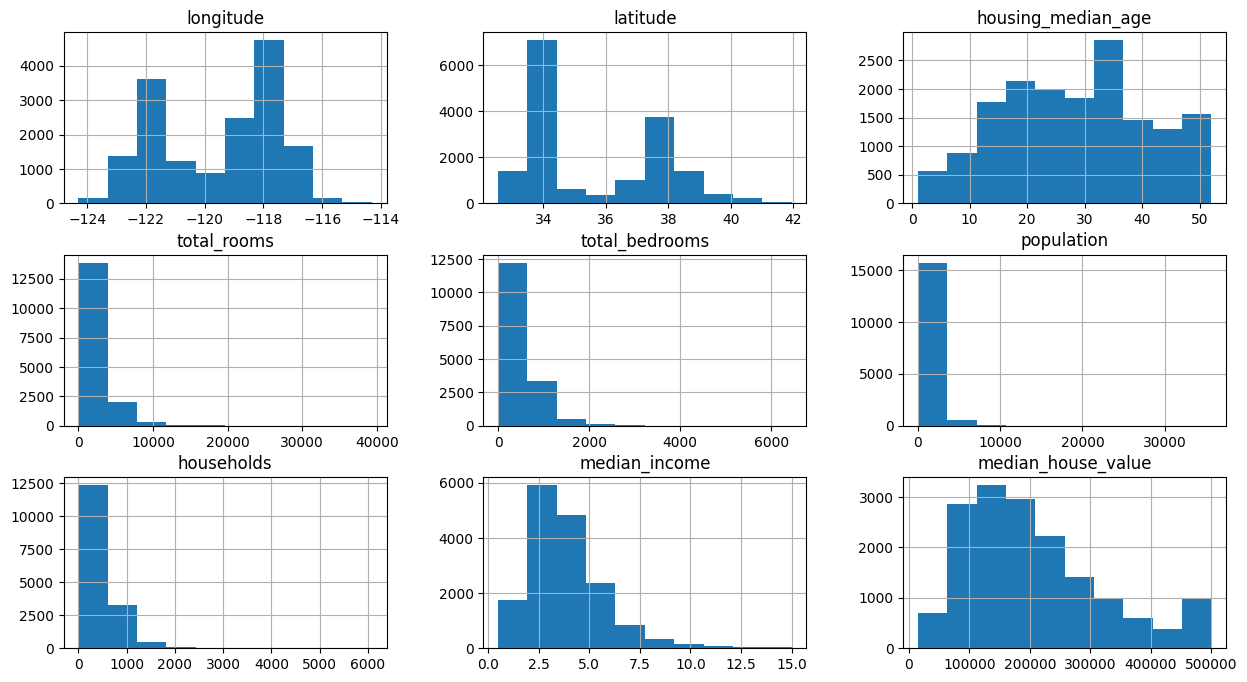

In [135]:
train_data.hist(figsize=(15, 8))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

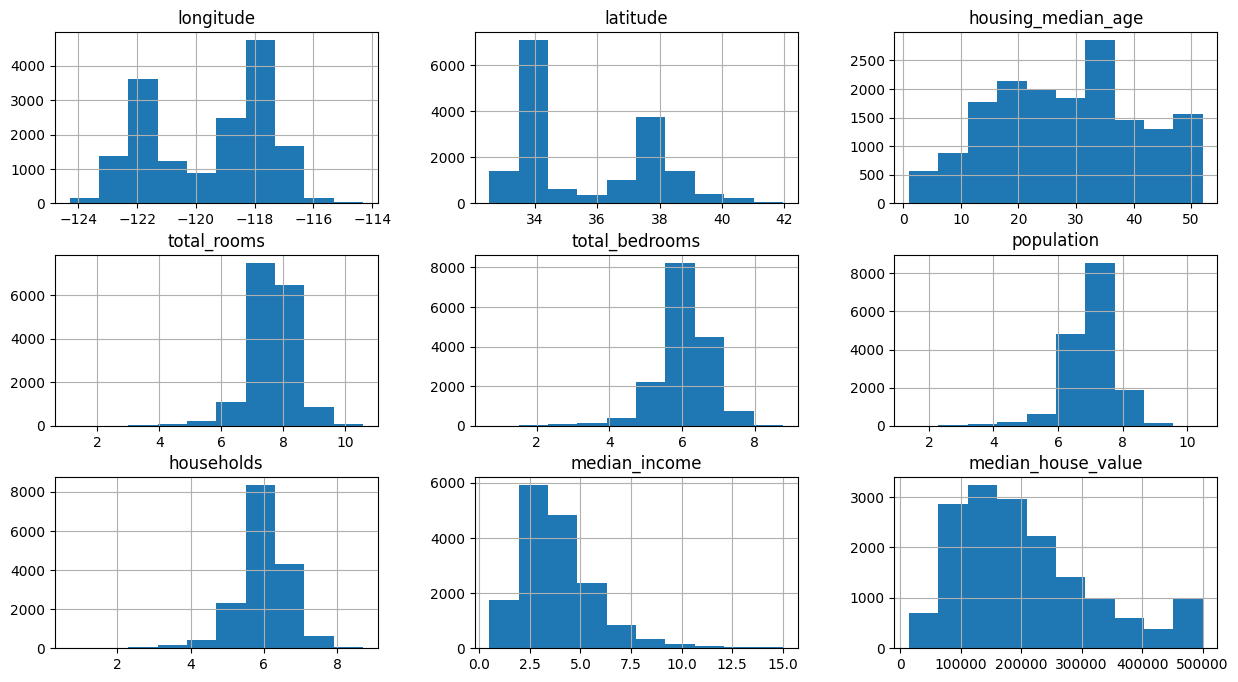

In [136]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)

train_data.hist(figsize=(15,8))


<Axes: xlabel='latitude', ylabel='longitude'>

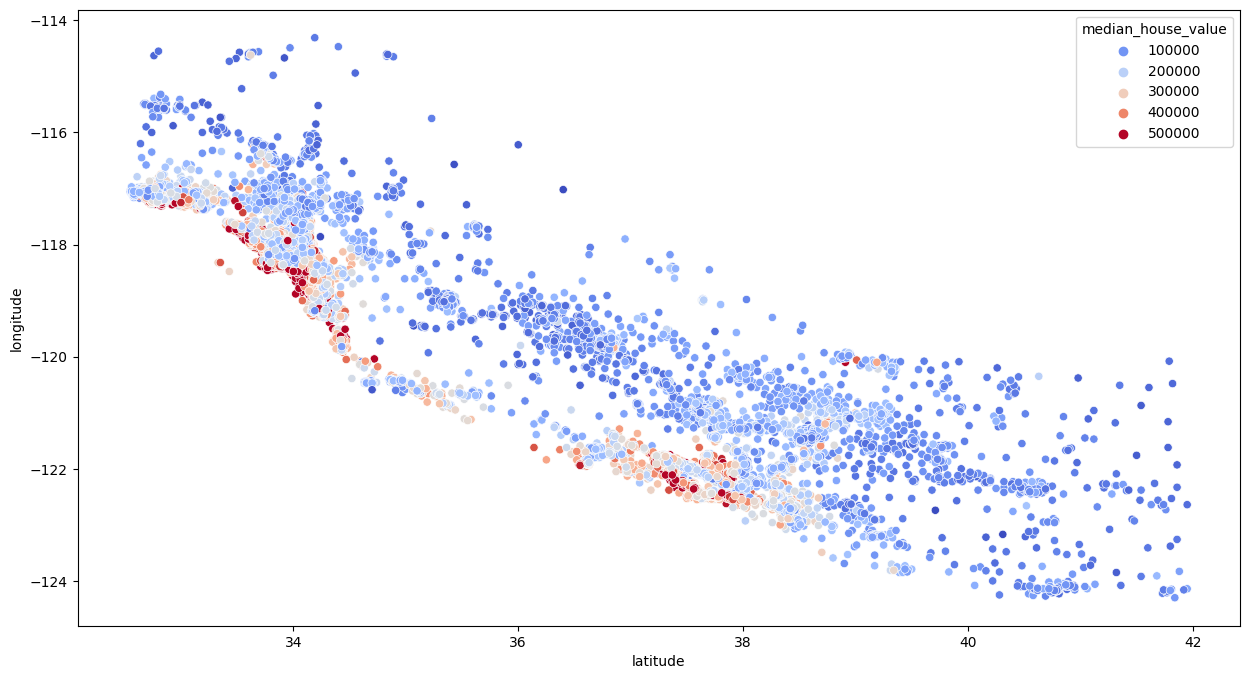

In [137]:

plt.figure(figsize=(15,8))

sns.scatterplot(x ="latitude", y = "longitude", data = train_data,  hue= "median_house_value" , palette= "coolwarm" )



                

In [138]:
x_train, y_train = train_data.drop(["median_house_value", "total_bedrooms"], axis = 1), train_data["median_house_value"]

print(x_train.info())
reg = LinearRegression()
reg.fit(x_train, y_train)



<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 7865 to 6643
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   population          16346 non-null  float64
 5   households          16346 non-null  float64
 6   median_income       16346 non-null  float64
dtypes: float64(7)
memory usage: 1.5 MB
None


LinearRegression()

In [140]:
test_data = x_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)

test_data["households"] = np.log(test_data["households"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)





test_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14020,-117.16,32.74,27.0,7.756195,6.405228,6.890609,6.381816,3.1921,261500.0
2479,-120.09,36.19,12.0,7.562162,6.327937,7.940940,6.284134,1.4191,55100.0
10192,-117.94,33.86,33.0,6.921658,5.746203,6.561031,5.587249,2.1432,197500.0
5045,-118.33,33.97,47.0,7.512618,5.913503,6.827629,5.934894,4.1635,156400.0
11550,-117.98,33.75,24.0,8.259976,6.688355,7.890208,6.650279,3.8158,180000.0
...,...,...,...,...,...,...,...,...,...
3904,-118.51,34.19,38.0,7.688455,6.016157,7.040536,5.940171,4.2865,221100.0
4978,-118.29,34.00,41.0,7.499977,6.202536,7.457032,6.156979,1.2347,111700.0
18975,-122.04,38.24,30.0,7.641084,6.124683,6.913737,6.084499,1.9954,92900.0
8074,-118.18,33.82,52.0,7.870548,6.159095,6.850126,6.089045,3.7895,254000.0


In [145]:
x_test, y_test = test_data.drop(["median_house_value", "total_bedrooms"], axis = 1), test_data["median_house_value"]

In [148]:
reg.score(x_test, y_test)


0.6637409028377008

In [152]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)


RandomForestRegressor()

In [153]:
forest.score(x_test,y_test)

0.8241079897462816